# Import Libs

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# Import Data

In [4]:
df = pd.read_csv('data/2019-2020 ISMEK Exact Registered Trainee Data.csv')

In [5]:
df.shape

(216765, 12)

In [7]:
df.info() # all columns are objects data tpye

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216765 entries, 0 to 216764
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   _id                    216765 non-null  int64 
 1   Donem                  216765 non-null  object
 2   Egitim Durumu          216765 non-null  object
 3   Engel Durumu           216765 non-null  object
 4   Calisma Durumu         216765 non-null  object
 5   Alan                   216765 non-null  object
 6   Program                216765 non-null  object
 7   Hak Edilen Belge Tipi  216765 non-null  object
 8   Kurs Merkezi           216765 non-null  object
 9   Kurs Merkezi Ylcesi    216765 non-null  object
 10  Tercih Sebebi          216765 non-null  object
 11  Yas Araligi            216765 non-null  object
dtypes: int64(1), object(11)
memory usage: 19.8+ MB


In [9]:
df.head()

,_id,Donem,Egitim Durumu,Engel Durumu,Calisma Durumu,Alan,Program,Hak Edilen Belge Tipi,Kurs Merkezi,Kurs Merkezi Ylcesi,Tercih Sebebi,Yas Araligi
0,1,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,2,2019-2020,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,3,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,4,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,5,2019-2020,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti


# Data Preparation and Cleaning

In [10]:
df.isnull().sum()[df.isnull().sum() > 0] # there is no missing value

Series([], dtype: int64)

In [11]:
df.columns

Index(['_id', 'Donem', 'Egitim Durumu', 'Engel Durumu', 'Calisma Durumu',
       'Alan', 'Program', 'Hak Edilen Belge Tipi', 'Kurs Merkezi',
       'Kurs Merkezi Ylcesi', 'Tercih Sebebi', 'Yas Araligi'],
      dtype='object')

In [27]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [30]:
df.columns # i changed the column names to work with same type foramt..

Index(['_id', 'donem', 'egitim_durumu', 'engel_durumu', 'calisma_durumu',
       'alan', 'program', 'hak_edilen_belge_tipi', 'kurs_merkezi',
       'kurs_merkezi_ylcesi', 'tercih_sebebi', 'yas_araligi'],
      dtype='object')

In [66]:
df.columns = df.columns.str.replace('kurs_merkezi_ylcesi', 'kurs_merkezi_ilcesi')
df.columns # there is no typo anymore

Index(['egitim_durumu', 'engel_durumu', 'calisma_durumu', 'alan', 'program',
       'hak_edilen_belge_tipi', 'kurs_merkezi', 'kurs_merkezi_ilcesi',
       'tercih_sebebi', 'yas_araligi'],
      dtype='object')

## ID

In [31]:
df._id.nunique() 

216765

- All values are unique also we know this not an important variable for us
- So i will delete this column

In [32]:
del df['_id']

## DONEM

In [33]:
df.donem.nunique()

1

In [35]:
df.donem.value_counts() # we know all columns are same so we don't need this information

2019-2020    216765
Name: donem, dtype: int64

In [36]:
del df['donem']

In [37]:
df.head()

,egitim_durumu,engel_durumu,calisma_durumu,alan,program,hak_edilen_belge_tipi,kurs_merkezi,kurs_merkezi_ylcesi,tercih_sebebi,yas_araligi
0,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A2 Seviyesi,Hak Etmedi,Dil Okulu,Sisli,"Meslek Edinmek, Meslegimde Ýlerlemek",20-30 Yas Arasi
1,Lise,Engeli Olmayan,Calismiyor,Spor,Fitness (Kadin),Ismek Sertifika,Silivri Spor Egitim Merkezi,Silivri,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20-30 Yas Arasi
2,Lisans,Engeli Olmayan,Ogrenci,Dil Egitimleri,Ingilizce A1 Seviyesi,Meb Sertifika,Tuzla Yayla Mahallesi,Tuzla,"Meslek Edinmek, Meslegimde Ýlerlemek",30-40 Yas Arasi
3,Lisans,Engeli Olmayan,Ogrenci,Spor,Crunch (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti
4,Lisans,Engeli Olmayan,Ogrenci,Spor,Stretching (Kadin),Hak Etmedi,Atasehir Kayisdagi,Atasehir,"Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek",20 Yas Alti


## Helpful Functions

In [103]:
def explore_categorical_column(df, column, tire_count = 20, plot = True):
    count = 10
    print('-' * tire_count + f'{column} analysis' + '-'* tire_count)
    print(f'There are --> {df[column].nunique()} values\n')
    print(f'First 10 Unique values --> {df[column].unique()[:count]}\n')
    print('-' * tire_count + 'Value counts' + '-'*tire_count)
    print(df[column].value_counts()[:count])
    print('-' * tire_count + 'Value counts with % percentage' + '-'*tire_count)
    print(f'{df[column].value_counts(normalize = True)[:count] * 100}\n')
    
    value_counts = df[column].value_counts()
    
    if plot:
        fig = px.bar(x=value_counts.index, y=value_counts.values, title = column)
        fig.show()


# EDA

## egitim_durumu

--------------------egitim_durumu analysis--------------------
There are --> 10 values

First 10 Unique values --> ['Lisans' 'Lise' 'On Lisans' 'Meslek Lisesi' 'Ilkogretim' 'Ilkokul'
 'Yuksek Lisans' 'Okur Yazar' 'Okuma Yazma Bilmiyorum' 'Doktora']

--------------------Value counts--------------------
Lisans                    88133
Lise                      44646
On Lisans                 33494
Ilkokul                   16242
Yuksek Lisans             12925
Ilkogretim                12009
Meslek Lisesi              6737
Doktora                    1092
Okur Yazar                  936
Okuma Yazma Bilmiyorum      551
Name: egitim_durumu, dtype: int64
--------------------Value counts with % percentage--------------------
Lisans                    40.658317
Lise                      20.596499
On Lisans                 15.451757
Ilkokul                    7.492907
Yuksek Lisans              5.962678
Ilkogretim                 5.540101
Meslek Lisesi              3.107974
Doktora             

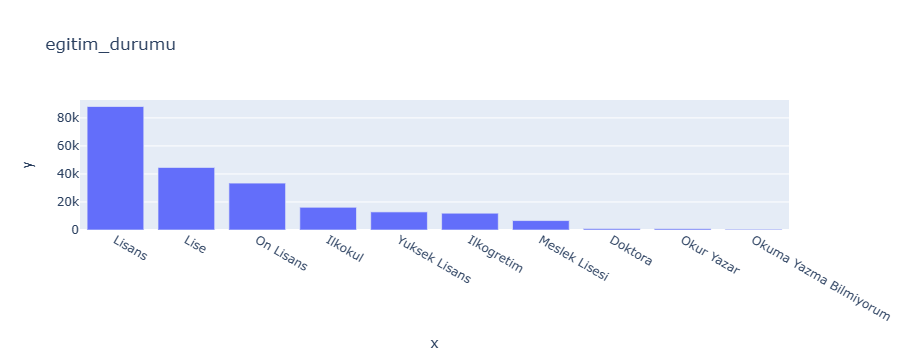

In [104]:
explore_categorical_column(df, 'egitim_durumu')

- Maybe we can group education status info or mayve we can change dtype to categorical like : Doktara > Yuksek lisans ...
- Groups can be like;
    - Okuma yazma bilmiyorum
    - Okur Yazar :  {'Okur Yazar', 'Ilkogretim', 'Ilkokul'}
    - Lise : {'Lise', 'Meslek Lisesi'}
    - Universite : {'On Lisans', 'Lisans', 'Yuksek Lisans', 'Doktora'}

In [125]:
df_tmp = df[['egitim_durumu']].copy()

In [126]:
def group_edu_status(x):
    if x in ['Okur Yazar', 'Ilkogretim', 'Ilkokul']:
        return 'Okur Yazar'
    elif x in ['On Lisans', 'Lisans', 'Yuksek Lisans', 'Doktora']:
        return 'Universite'
    elif x in ['Meslek Lisesi', 'Lise']:
        return 'Lise'
    else: return x 

In [127]:
df_tmp['egitim_durumu'] = df_tmp['egitim_durumu'].apply(group_edu_status)

--------------------egitim_durumu analysis--------------------
There are --> 4 values

First 10 Unique values --> ['Universite' 'Lise' 'Okur Yazar' 'Okuma Yazma Bilmiyorum']

--------------------Value counts--------------------
Universite                135644
Lise                       51383
Okur Yazar                 29187
Okuma Yazma Bilmiyorum       551
Name: egitim_durumu, dtype: int64
--------------------Value counts with % percentage--------------------
Universite                62.576523
Lise                      23.704473
Okur Yazar                13.464812
Okuma Yazma Bilmiyorum     0.254192
Name: egitim_durumu, dtype: float64



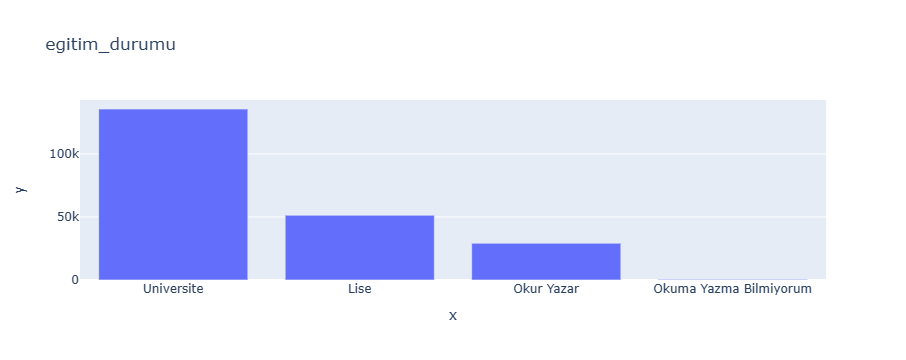

In [128]:
explore_categorical_column(df_tmp, 'egitim_durumu')

- Maybe it can be help better results will see later.

## engel_durumu

--------------------engel_durumu analysis--------------------
There are --> 6 values

First 10 Unique values --> ['Engeli Olmayan' 'isitme' 'GOrme' 'Ortopedik' 'Suregen' 'Konusma Guclugu']

--------------------Value counts--------------------
Engeli Olmayan     214098
Ortopedik             910
Suregen               874
GOrme                 321
isitme                281
Konusma Guclugu       281
Name: engel_durumu, dtype: int64
--------------------Value counts with % percentage--------------------
Engeli Olmayan     98.769635
Ortopedik           0.419809
Suregen             0.403202
GOrme               0.148087
isitme              0.129633
Konusma Guclugu     0.129633
Name: engel_durumu, dtype: float64



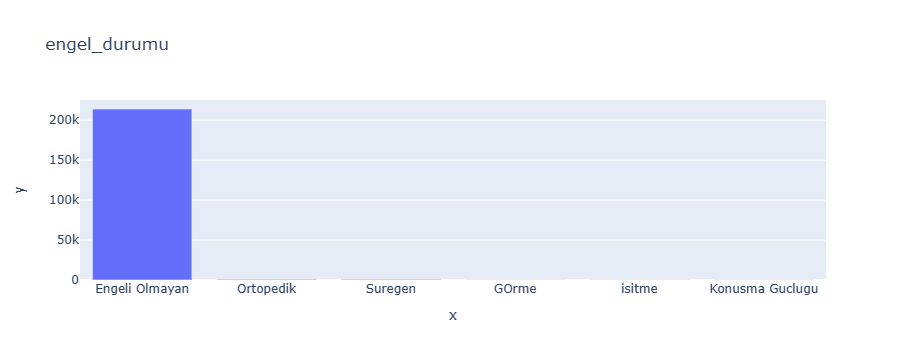

In [93]:
explore_categorical_column(df, 'engel_durumu')

- There is high cardinatay in this variabel so we need to delete this.
- Because there is no important information 

In [94]:
del df['engel_durumu']

## calisma_durumu

--------------------calisma_durumu analysis--------------------
There are --> 5 values

First 10 Unique values --> ['Ogrenci' 'Calismiyor' 'Calisiyor' 'Emekli' 'Bos']

--------------------Value counts--------------------
Calismiyor    103132
Calisiyor      58390
Ogrenci        47904
Emekli          5752
Bos             1587
Name: calisma_durumu, dtype: int64
--------------------Value counts with % percentage--------------------
Calismiyor    47.577792
Calisiyor     26.937006
Ogrenci       22.099509
Emekli         2.653565
Bos            0.732129
Name: calisma_durumu, dtype: float64



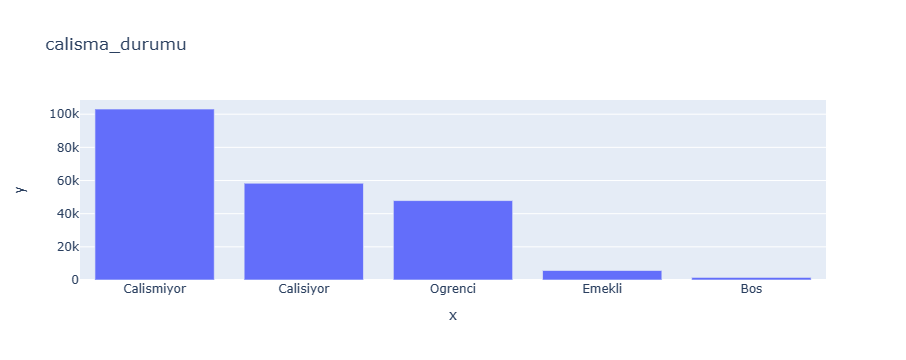

In [95]:
explore_categorical_column(df, 'calisma_durumu')

## alan

--------------------alan analysis--------------------
There are --> 33 values

First 10 Unique values --> ['Dil Egitimleri' 'Spor' 'Moda Tasarimi Ve Tekstil Teknolojisi'
 'Gastronomi Ve Mutfak Sanatlari' 'Bilisim Teknolojileri'
 'Grafik Ve Teknik Tasarim' 'Kisisel Gelisim Ve Egitim'
 'Muhasebe Ve Finans' 'Orgu Ve Ýsleme Sanatlari' 'Muzik']

--------------------Value counts--------------------
Bilisim Teknolojileri                   89580
Spor                                    23254
Grafik Ve Teknik Tasarim                15405
Dil Egitimleri                          14271
Kisisel Gelisim Ve Egitim               13555
Orgu Ve Ýsleme Sanatlari                 8618
Moda Tasarimi Ve Tekstil Teknolojisi     7198
Sanat Ve Tasarim                         5652
El Sanatlari Teknolojisi                 5347
Gastronomi Ve Mutfak Sanatlari           5213
Name: alan, dtype: int64
--------------------Value counts with % percentage--------------------
Bilisim Teknolojileri                   41.32586

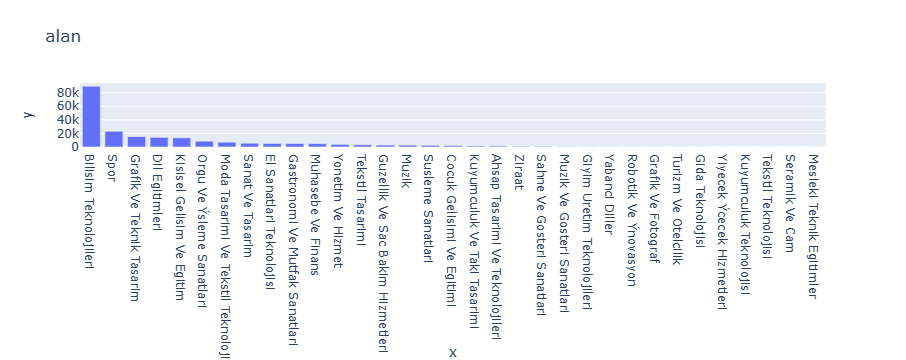

In [96]:
explore_categorical_column(df, 'alan')

- Maybe we can create a diffrent model only predict the "Bilisim Teknolojileri" area programs.
    - Also we can create diffrent models for top 5 areas because these areas have a lot of programs.
- We can group same smilar area then can predict these areas

## program

In [129]:
explore_categorical_column(df, 'program', plot = False)

--------------------program analysis--------------------
There are --> 541 values

First 10 Unique values --> ['Ingilizce A2 Seviyesi' 'Fitness (Kadin)' 'Ingilizce A1 Seviyesi'
 'Crunch (Kadin)' 'Stretching (Kadin)' 'Giyim Uretiminde Temel Islemler'
 'Hamur Teknikleri' 'Pastaci Ciragi'
 'Seker Hamuru Ile Susleme Ve Makaron Yapim Teknikleri Atolyesi'
 'Powerpoint 2019 Kullanimi']

--------------------Value counts--------------------
Excel 2019 Kullanimi                    9570
Algoritma Ve Programlamaya Temelleri    8241
Fitness (Kadin)                         6622
Fitness (Erkek)                         5267
Illustrator Cizim Uygulamalari 3        5125
Pilates 1. Seviye                       5078
Kurumsal Yazili Iletisim Teknikleri     4550
Blog Web Sitesi Yapimi Ve Bloggerlik    4512
Uygulamalarla Ileri Excel Formulleri    4019
Aerobik                                 4001
Name: program, dtype: int64
--------------------Value counts with % percentage--------------------
Excel 2019 Kull

## hak_edilen_belge_tipi

--------------------hak_edilen_belge_tipi analysis--------------------
There are --> 3 values

First 10 Unique values --> ['Hak Etmedi' 'Ismek Sertifika' 'Meb Sertifika']

--------------------Value counts--------------------
Hak Etmedi         126184
Ismek Sertifika     54446
Meb Sertifika       36135
Name: hak_edilen_belge_tipi, dtype: int64
--------------------Value counts with % percentage--------------------
Hak Etmedi         58.212350
Ismek Sertifika    25.117524
Meb Sertifika      16.670127
Name: hak_edilen_belge_tipi, dtype: float64



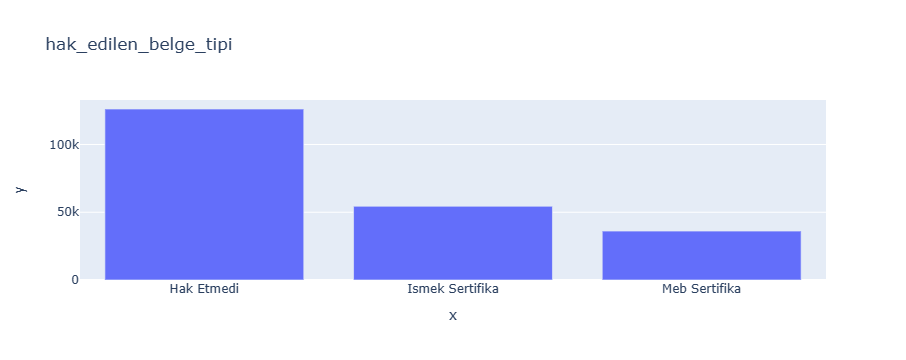

In [130]:
explore_categorical_column(df, 'hak_edilen_belge_tipi')

- We can see that many people do not qualify for certification.
    - So we can resarch this topic and then we can create a spesific model to predict quaily or not ???
    
   

## kurs_merkezi

In [99]:
explore_categorical_column(df, 'kurs_merkezi', plot = False)

--------------------kurs_merkezi analysis--------------------
There are --> 190 values

First 10 Unique values --> ['Dil Okulu' 'Silivri Spor Egitim Merkezi' 'Tuzla Yayla Mahallesi'
 'Atasehir Kayisdagi' 'Bagcilar Kirazli'
 'K.Cekmece Halkali Toplu Konutlar' 'K.Cekmece Yesilova'
 'Gungoren Spor Egitim Merkezi' 'Uzaktan Egitim'
 'Beylikduzu Baris Mahallesi']

--------------------Value counts--------------------
Uzaktan Egitim                             105187
Fatih Bilisim Okulu                          2539
Fatih Dil Okulu                              2299
Kartal Yakacik Spor Egitim Merkezi           1814
Tuzla Spor Egitim Merkezi                    1807
Kartal Atalar Spor Egitim Merkezi            1788
Kagithane Sultan Selim Mahallesi             1646
Gungoren Spor Egitim Merkezi                 1600
Kartal Hurriyet Mh. Spor Egitim Merkezi      1591
Umraniye Mithatpasa Spor Egitim Merkezi      1562
Name: kurs_merkezi, dtype: int64
--------------------Value counts with % percentage---

## kurs_merkezi_ilcesi

--------------------kurs_merkezi_ilcesi analysis--------------------
There are --> 37 values

First 10 Unique values --> ['Sisli' 'Silivri' 'Tuzla' 'Atasehir' 'Bagcilar' 'Kucukcekmece' 'Gungoren'
 'Esenler' 'Beylikduzu' 'Sultanbeyli']

--------------------Value counts--------------------
Esenler          108485
Kartal             8141
Fatih              8042
Kucukcekmece       6458
Umraniye           5366
Pendik             5134
Uskudar            4761
Sultanbeyli        4652
Kagithane          4587
Gaziosmanpasa      4212
Name: kurs_merkezi_ilcesi, dtype: int64
--------------------Value counts with % percentage--------------------
Esenler          50.047286
Kartal            3.755680
Fatih             3.710009
Kucukcekmece      2.979263
Umraniye          2.475492
Pendik            2.368464
Uskudar           2.196388
Sultanbeyli       2.146103
Kagithane         2.116117
Gaziosmanpasa     1.943118
Name: kurs_merkezi_ilcesi, dtype: float64



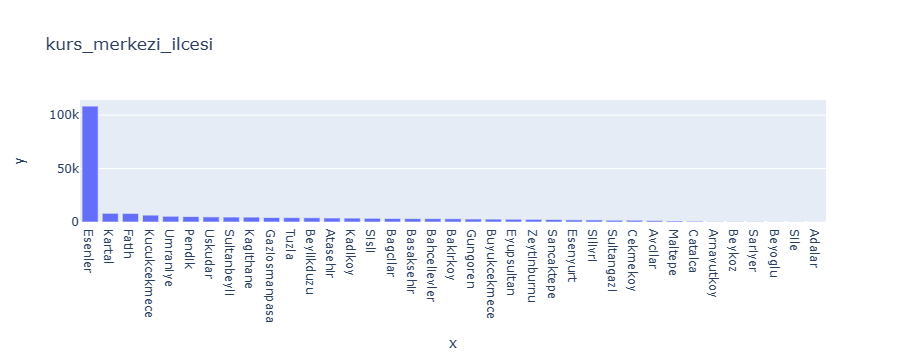

In [100]:
explore_categorical_column(df, 'kurs_merkezi_ilcesi')

## tercih_sebebi

--------------------tercih_sebebi analysis--------------------
There are --> 5 values

First 10 Unique values --> ['Meslek Edinmek, Meslegimde Ýlerlemek'
 'Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek'
 'Uretim Yaparak Gelir Elde Etmek' 'Sosyal Cevre Edinmek'
 'Yeni Bir Meslek Edinmek']

--------------------Value counts--------------------
Meslek Edinmek, Meslegimde Ýlerlemek              131358
Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek     42924
Uretim Yaparak Gelir Elde Etmek                    27289
Sosyal Cevre Edinmek                               15193
Yeni Bir Meslek Edinmek                                1
Name: tercih_sebebi, dtype: int64
--------------------Value counts with % percentage--------------------
Meslek Edinmek, Meslegimde Ýlerlemek              60.599266
Sanat,Muzik,Spor Vb. Yeteneklerimi Gelistirmek    19.802090
Uretim Yaparak Gelir Elde Etmek                   12.589210
Sosyal Cevre Edinmek                               7.008973
Yeni Bir Meslek Edinmek   

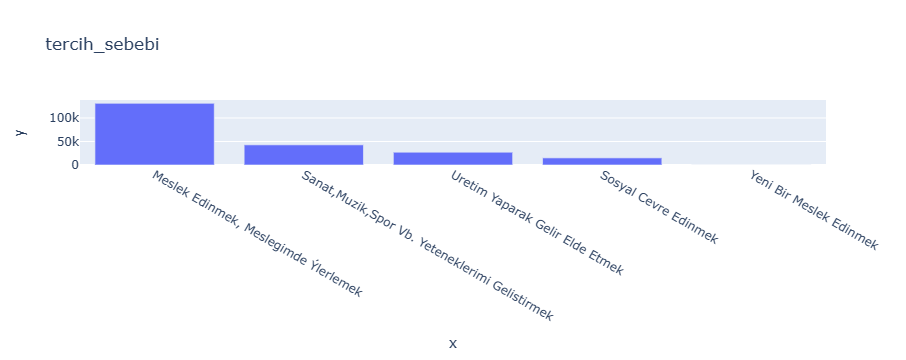

In [101]:
explore_categorical_column(df, 'tercih_sebebi')

## yas_araligi

--------------------yas_araligi analysis--------------------
There are --> 6 values

First 10 Unique values --> ['20-30 Yas Arasi' '30-40 Yas Arasi' '20 Yas Alti' '40-50 Yas Arasi'
 '50-60 Yas Arasi' '60 Yas ustu']

--------------------Value counts--------------------
20-30 Yas Arasi    93354
30-40 Yas Arasi    49334
40-50 Yas Arasi    36724
50-60 Yas Arasi    19136
20 Yas Alti        12099
60 Yas ustu         6118
Name: yas_araligi, dtype: int64
--------------------Value counts with % percentage--------------------
20-30 Yas Arasi    43.066916
30-40 Yas Arasi    22.759209
40-50 Yas Arasi    16.941849
50-60 Yas Arasi     8.827993
20 Yas Alti         5.581621
60 Yas ustu         2.822411
Name: yas_araligi, dtype: float64



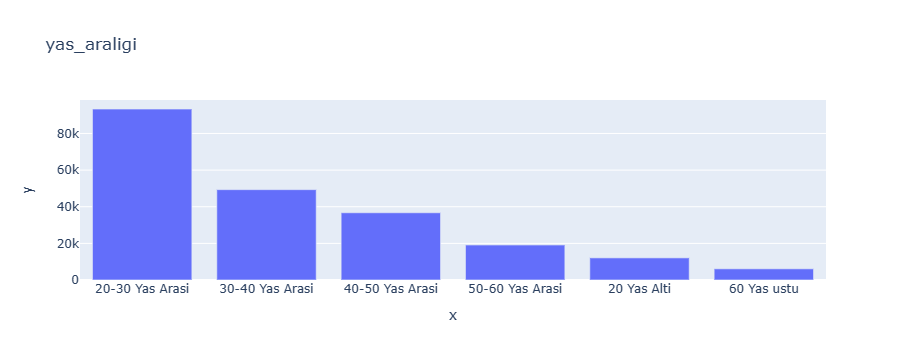

In [102]:
explore_categorical_column(df, 'yas_araligi')